In [26]:
from typing import List,Dict
from langgraph.graph import StateGraph,START,END
from langchain_ollama.llms import OllamaLLM

state = {
  "messages": [
    {"role": "user", "content": "Hi"},
    {"role": "assistant", "content": "Hello! How can I help you today?"},
    {"role": "user", "content": "Who is Mike Tyson?"},
    {"role": "assistant", "content": "Mike Tyson is a former professional boxer from the United States, known for being one of the greatest heavyweight champions in boxing history."}
  ]
}


In [27]:
#1:Define State
class State(Dict):
    messages:List[Dict[str,str]]

In [28]:
#2:Initialize the StateGraph
graph_builder=StateGraph(State)

In [29]:
#Initialize the LLM
llm=OllamaLLM(model="llama3.2:1b")

In [30]:
# Define chatbot function
def chatbot(state: State):
    response = llm.invoke(state["messages"])
    state["messages"].append({"role": "assistant", "content": response})
    return {"messages": state["messages"]}


In [31]:
#Add Nodes and Edges
graph_builder.add_node("chatbot",chatbot)
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)

In [32]:
graph=graph_builder.compile()

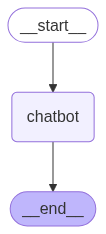

In [33]:
graph

In [34]:
# Stream updates
def stream_graph_updates(user_input: str):
    state = {"messages": [{"role": "user", "content": user_input}]}
    for event in graph.stream(state):
        for value in event.values():
            print("Assistant:", value["messages"][-1]["content"])


In [35]:
# Run chatbot in a loop
if __name__ == "__main__":
    while True:
        try:
            user_input = input("User: ")
            if user_input.lower() in ["quit", "exit", "q"]:
                print("Goodbye!")
                break

            stream_graph_updates(user_input)
        except Exception as e:
            print(f"An error occurred: {e}")
            break


Assistant: Hello. What's on your mind?
Assistant: I'm not capable of experiencing emotions or forming personal relationships. However, I can offer you a conversation where we can talk about how someone might respond to being asked if they like them. Would you like to explore that topic further?
Assistant: It seems like you're simply acknowledging the situation or expression. Is there something specific you'd like to talk about or ask, or are you just being polite? I'm here to listen and help if I can.
Assistant: Mike Tyson was a professional boxer who competed from 1985 to 2005. He is widely regarded as one of the greatest boxers of all time, known for his formidable punching power and intimidating presence in the ring.

Born on June 30, 1966, in San Francisco, California, Tyson began boxing at a young age and quickly rose through the ranks. He won the undisputed heavyweight championship of the world three times: vs. Michael Spinks (1988), vs. Bruce Seldon (1996), and vs. Evander Holyf